In [5]:
#Importing the needed packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import random
import time
import os

In [6]:
start = time.time()
expedia_df = pd.read_csv('training_set_VU_DM_2014.csv')
#test_df = pd.read_csv('test_set_VU_DM_2014.csv')
print('Loading dataset took {} seconds'.format(time.time()-start))

Loading dataset took 22.58494782447815 seconds


In [12]:
expedia_df.shape

(4958347, 54)

In [13]:
expedia_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [16]:
data = expedia_df[['srch_id','date_time','site_id','visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd',
                   'comp1_rate','comp1_inv','comp1_rate_percent_diff',
                   'comp2_rate','comp2_inv','comp2_rate_percent_diff',
                   'comp3_rate','comp3_inv','comp3_rate_percent_diff',
                   'comp4_rate','comp4_inv','comp4_rate_percent_diff',
                   'comp5_rate','comp5_inv','comp5_rate_percent_diff',
                   'comp6_rate','comp6_inv','comp6_rate_percent_diff',
                   'comp7_rate','comp7_inv','comp7_rate_percent_diff',
                   'comp8_rate','comp8_inv','comp8_rate_percent_diff']]

In [21]:
sample_data = data.sample(100000)


([<matplotlib.axis.XTick at 0x7fa097f56940>,
 <a list of 30 Text xticklabel objects>)

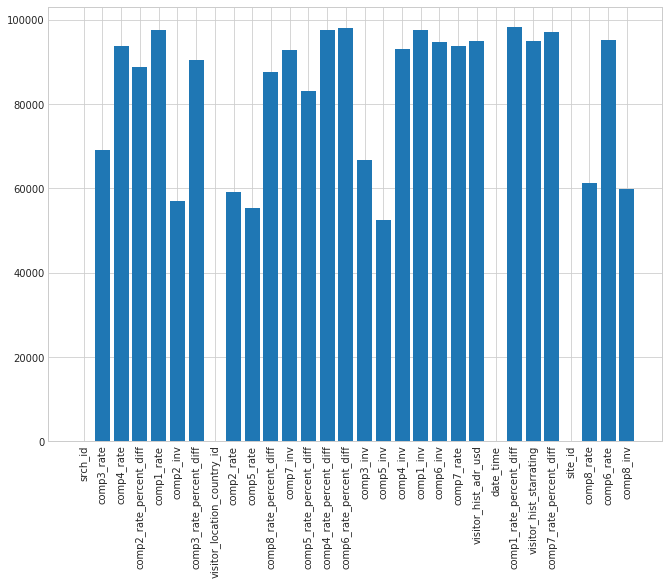

In [39]:
def get_null(prop,data):
    return sum(pd.isnull(data[prop]))

d = {prop: get_null(prop,sample_data) for prop in list(sample_data.keys())}
fig,ax = plt.subplots()
fig.set_size_inches(11,8)
plt.bar(range(len(d)),d.values(),align='center')
plt.xticks(range(len(d)),d.keys(),rotation=90)

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
count,100000.000000,100000.000000,100000.000000,5075.000000,5097.000000,2338.000000,2503.000000,1796.000000,40856.000000,42992.000000,...,16850.000000,4829.000000,5251.000000,1883.000000,6337.000000,7125.000000,2812.000000,38754.000000,40263.000000,12350.000000
mean,166289.501840,9.989830,175.611900,3.382849,176.198948,0.441403,0.025969,208.336303,0.047827,0.039077,...,17.901306,0.114931,0.073891,17.651089,0.145495,0.078035,19.026671,-0.059116,0.010680,14.290202
std,96272.482211,7.699045,65.798077,0.685928,111.914369,0.652985,0.223796,1060.121824,0.446544,0.232821,...,21.486180,0.557619,0.302790,30.891068,0.580873,0.311355,38.893944,0.468654,0.207732,17.462823
min,4.000000,1.000000,1.000000,1.500000,0.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000
25%,82659.750000,5.000000,100.000000,2.920000,109.400000,0.000000,0.000000,7.000000,0.000000,0.000000,...,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000
50%,165606.500000,5.000000,219.000000,3.450000,152.150000,1.000000,0.000000,10.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000
75%,250097.000000,14.000000,219.000000,3.940000,212.540000,1.000000,0.000000,16.000000,0.000000,0.000000,...,20.000000,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000
max,332784.000000,34.000000,231.000000,5.000000,1410.400000,1.000000,1.000000,9182.000000,1.000000,1.000000,...,734.000000,1.000000,1.000000,566.000000,1.000000,1.000000,1061.000000,1.000000,1.000000,740.000000
